In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [90]:
import pandas as pd

df= pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [91]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [93]:
df.duplicated().sum()

1768

In [94]:
df = df.drop_duplicates()

In [95]:
df.duplicated().sum()

0

In [96]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [97]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [98]:
label_encoder = LabelEncoder()
df.gender = label_encoder.fit_transform(df.gender)

In [99]:
df['forehead_width_cm']=df['forehead_width_cm'].astype(int)
df['long_hair']=df['long_hair'].astype(int)
df['forehead_height_cm']=df['forehead_height_cm'].astype(int)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11,6,1,0,1,1,1
1,0,14,5,0,0,1,0,0
2,0,11,6,1,1,1,1,1
3,0,14,6,0,1,1,1,1
4,1,13,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11,6,1,1,0,1,1
4990,1,12,5,0,0,1,0,0
4992,1,14,7,1,1,1,1,1
4993,1,11,5,0,0,0,1,0


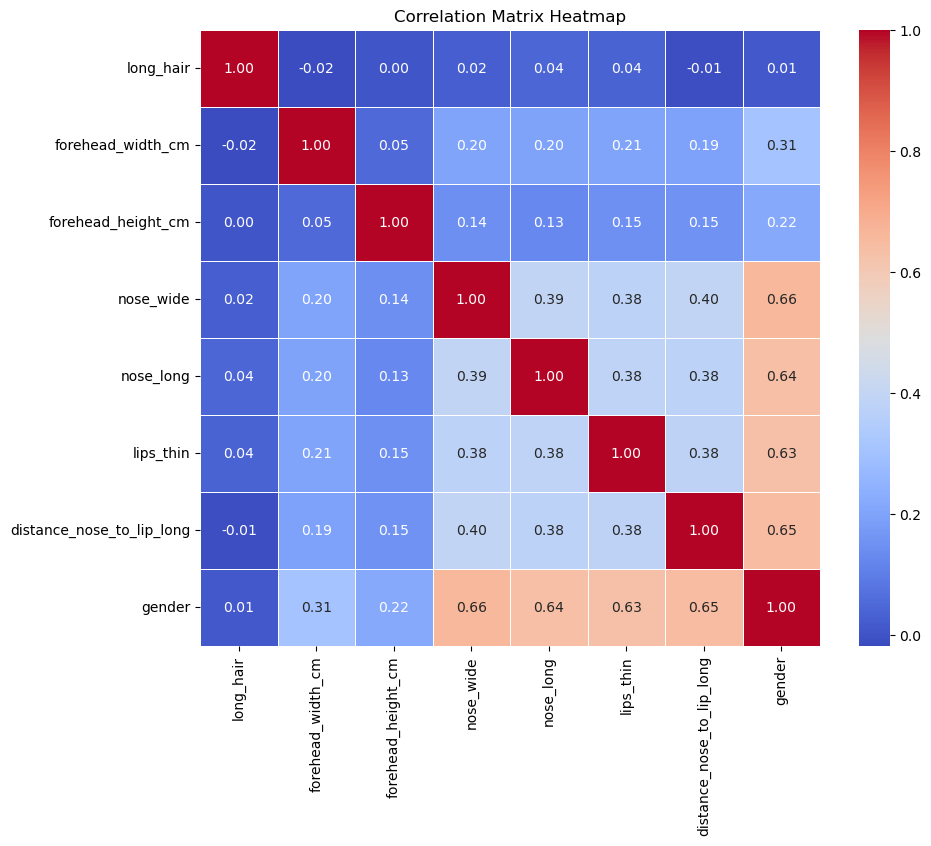

In [100]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


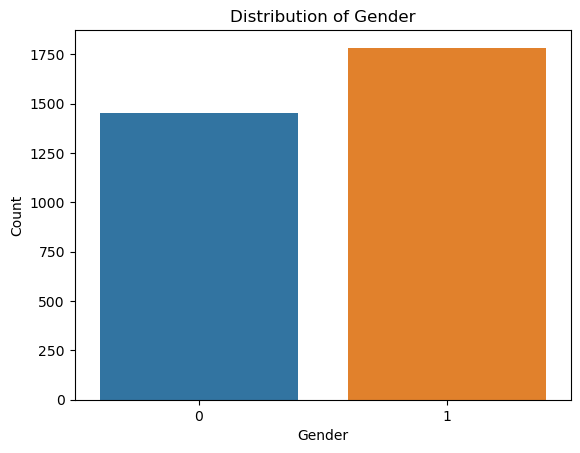

In [101]:
sns.countplot(data=df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

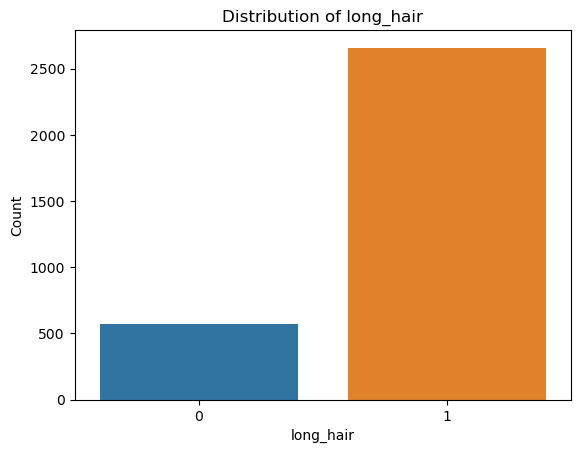

In [102]:
sns.countplot(data=df, x='long_hair')
plt.xlabel('long_hair')
plt.ylabel('Count')
plt.title('Distribution of long_hair')
plt.show()

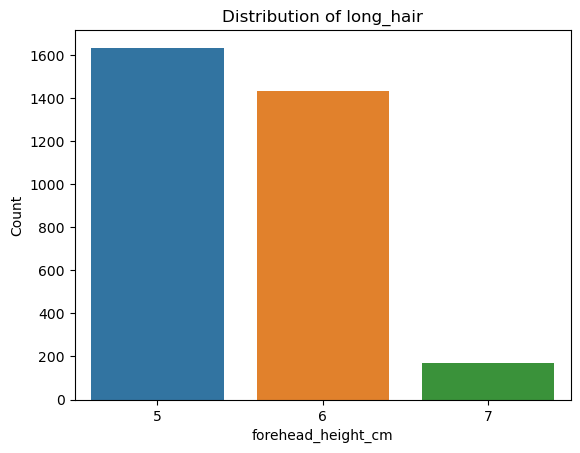

In [103]:
sns.countplot(data=df, x='forehead_height_cm')
plt.xlabel('forehead_height_cm')
plt.ylabel('Count')
plt.title('Distribution of long_hair')
plt.show()

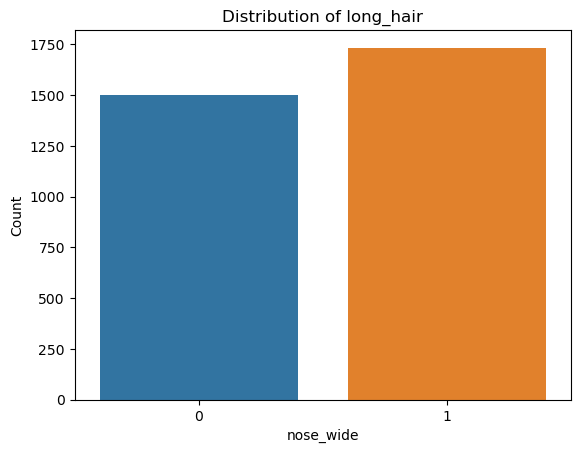

In [104]:
sns.countplot(data=df, x='nose_wide')
plt.xlabel('nose_wide')
plt.ylabel('Count')
plt.title('Distribution of long_hair')
plt.show()

In [105]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11,6,1,0,1,1,1
1,0,14,5,0,0,1,0,0
2,0,11,6,1,1,1,1,1
3,0,14,6,0,1,1,1,1
4,1,13,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11,6,1,1,0,1,1
4990,1,12,5,0,0,1,0,0
4992,1,14,7,1,1,1,1,1
4993,1,11,5,0,0,0,1,0


In [106]:
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'lips_thin', 'distance_nose_to_lip_long']]

y = df['gender']  # Replace 'Target' with the actual name of your target column

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
model = LogisticRegression(random_state=42)

In [110]:
# Create a logistic regression model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [111]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [113]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9335394126738794


In [114]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[289  19]
 [ 24 315]]


In [115]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
1    1444
0    1142
Name: gender, dtype: int64

Test set class distribution:
1    339
0    308
Name: gender, dtype: int64


In [116]:
#DecisionTreeClassifier
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'lips_thin', 'distance_nose_to_lip_long']]

y = df['gender']  # Replace 'Target' with the actual name of your target column


In [117]:
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
#Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

In [119]:
# Train the model
model.fit(X_train, y_train_d)

DecisionTreeClassifier(random_state=42)

In [120]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [121]:
# Evaluate the model
accuracy = accuracy_score(y_test_d, y_pred)
conf_matrix = confusion_matrix(y_test_d, y_pred)
classification_rep = classification_report(y_test_d, y_pred)

In [122]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9397217928902627


In [123]:
# Create a random forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [124]:
# Make predictions
predictions = random_forest.predict(X_test)

In [125]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [126]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9443585780525502


In [127]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Create an SVM model
svm = SVC(kernel='linear')

In [129]:
# Train the model
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [130]:
# Make predictions
predictions = svm.predict(X_test_scaled)

In [131]:
accuracy = accuracy_score(y_test, predictions)

In [132]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9335394126738794


In [133]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [134]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [135]:
# Make predictions
predictions = knn.predict(X_test_scaled)

In [136]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9304482225656878


In [137]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [138]:
# Create a neural network model
neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

In [139]:
# Train the model
neural_network.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [140]:
# Train the model
neural_network.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [141]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

In [142]:
print(f'Accuracy: {accuracy}')


Accuracy: 0.9304482225656878
